# Scipy

The scipy package contains various toolboxes dedicated to common issues in scientific computing. Its different submodules correspond to different applications, such as interpolation, integration, optimization, image processing, statistics, special functions, etc. `scipy` is the core package for scientific routines in Python; it is meant to operate efficiently on numpy arrays, so that numpy and scipy work hand in hand.

Here are some of the sub-packages contained in Scipy:

* File input/output: scipy.io
* Special functions: scipy.special
* Linear algebra operations: scipy.linalg
* Fast Fourier transforms: scipy.fftpack
* Optimization and fit: scipy.optimize
* Statistics and random numbers: scipy.stats
* Interpolation: scipy.interpolate
* Numerical integration: scipy.integrate
* Signal processing: scipy.signal
* Image processing: scipy.ndimage

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# The Statistics sub-package

The `scipy.stats` sub-package contains a large number of probability distributions as well as a growing library of statistical functions. This is a great tool to have for any Data Analyst/Scientist using Python because Statistics is at the core of Data Science. 

In this section we learn how to perform common statistical computations with Python and use them to make sense of a dataset that contains information about alcohol consumption of teenagers.

`Please Note` : Statistics is a very wide and mathematical topic and beyond the scope of this course. The objective of this NB is to get you introduced to SciPy stats sub-package. Further Reading is given at the end of the NB.

# Project: Alcohol consumption of students

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import sqrt, arange
from scipy import stats
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In this project we use a dataset containing information about Portuguese students from two public schools. This is a real world dataset that was collected in order to study alcohol consumption in young people and its effects on students' academic performance. The dataset was built from two sources: school reports and questionnaires.

**Attributes:** `total to 33 attributes`

* school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira) 
* sex - student's sex (binary: 'F' - female or 'M' - male) 
* age - student's age (numeric: from 15 to 22) 
- address - student's home address type (binary: 'U' - urban or 'R' - rural) 
- famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3) 
- Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart) 
- Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 -secondary education or 4 - higher education) 
- Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 -secondary education or 4 - higher education) 
- Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other') 
- Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other') 
- reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other') 
- guardian - student's guardian (nominal: 'mother', 'father' or 'other') 
- traveltime - home to school travel time (numeric: 1 <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour) 
- studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours) 
- failures - number of past class failures (numeric: n if 1<=n<3, else 4) 
- schoolsup - extra educational support (binary: yes or no) 
- famsup - family educational support (binary: yes or no) 
- paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no) 
- activities - extra-curricular activities (binary: yes or no) 
- nursery - attended nursery school (binary: yes or no) 
- higher - wants to take higher education (binary: yes or no) 
- internet - Internet access at home (binary: yes or no) 
- romantic - with a romantic relationship (binary: yes or no) 
- famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent) 
- freetime - free time after school (numeric: from 1 - very low to 5 - very high) 
- goout - going out with friends (numeric: from 1 - very low to 5 - very high) 
- Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high) 
- Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high) 
- health - current health status (numeric: from 1 - very bad to 5 - very good) 
- absences - number of school absences (numeric: from 0 to 93) 

**these grades are related with the course subject:**

- G1 - first period grade (numeric: from 0 to 20) 
- G2 - second period grade (numeric: from 0 to 20) 
- G3 - final grade (numeric: from 0 to 20, output target) 

In [6]:
# Load data
student = pd.read_csv('C:\Program Files/Python36/suven/Data Anaylsis/Dataset/student.csv',sep=";")



In [7]:
# see first few records
student.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In this demostration we are interested in 3 variables:

1. Alcohol consumption level (we will create it and call it `acl`)
2. Final grade for the course subject (`G3`)
3. Gender of the student

In [8]:
student.rename(columns={'sex':'gender'}, inplace=True)
student['alcohol_index'] = (5*student['Dalc'] + 2*student['Walc'])/7
# Alcohol consumption level
student['acl'] = student['alcohol_index'] <= 2
student['acl'] = student['acl'].map({True: 'Low', False: 'High'})

## Confidence Intervals

### Confidence interval for the mean of the final grade

We can calculate `confidence intervals for means and for proportions`.

with mean

H0=null hypothesis===>average (mean(mean value of 5.6" is stated with 95 to 99% confidence)) htg of indian men is 5.6

H1=alternative hypothesis

or 

with proportion
H0= Most(>50% with 95 to 99% confidence ) of ceo are male


In [9]:
sample_size = student.shape[0]#---->[0] means rows
print(sample_size)

649


Because we have a sample size that is much greater than 30, we can use the [Central Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem) to calculate confidence intervals. According to this theorem we can calculate a confidence interval for the mean using the normal distribution.

To get the confidence interval for the mean we need three numbers:

1. Sample mean
2. Standard error
3. Confidence level

Formula for the standard error:

$$ SE = \frac{s}{\sqrt n} $$

In [10]:
sample_mean_grade = student['G3'].mean()
sample_mean_grade

11.906009244992296

In [11]:
std_error_grades = student['G3'].std()/sqrt(sample_size)

In [38]:
stats.norm.interval(0.95, loc=sample_mean_grade, scale=std_error_grades)

# interval(confidence, loc=0, scale=1) -> endpoints of the range that contains alpha percent of the distribution
# for eg : if confidence = 0.95 that means the acceptance region is 95%.
# mostly confidence is 0.95 or 0.98 or 0.99
# or inversely we can say the alpha value is 0.05 or 0.02 or 0.01
# loc parameter specifies the mean
# scale parameter specifies the standard devaition

# Note : Here .interval() is working on a Normal distribution.
# There are two ways of using probability distribution functions.
# 1. A “frozen” distribution   and   2. Non-frozen 
# 1. A “frozen” distribution is one with its parameters set to specific values. 
# n = stats.norm(loc=3.5, scale=2.0)
# n.rvs() # getting a random variable from the normal distribution
# 2. We have used the Non-Frozen distribution , as we have calculated the loc and scale and then applied.

(11.65745768566587, 12.154560804318722)

Now let's calculate a confidence interval for the proportion of students with High Alcohol Consumption Level. Again we need 3 numbers:

1. Sample proportion
2. Standard error
3. Confidence level

For proportions the standard error is given by:

$$ SE = \sqrt \frac{\hat p (1 - \hat p)}{n} $$

In [12]:
student['acl'].value_counts(normalize=True)

Low     0.744222
High    0.255778
Name: acl, dtype: float64

In [13]:
high_prop = student['acl'].value_counts(normalize=True)['High']
std_error_prop = sqrt(high_prop*(1-high_prop)/sample_size)

In [14]:
stats.norm.interval(0.95, loc=high_prop, scale=std_error_prop)

(0.2222114195583801, 0.28934482081141966)

0.25 (or 25.0%) seems like a good guess for the proportion of students with High Alcohol Consumption Levels in the population.

## Probability calculations

There are dozens of probability distributions available in the stats package for doing simulations of random variables or probability calculations. You can take a look at this 
(https://www.probabilitycourse.com/chapter3/3_1_3_pmf.php) to understand PMF

**Assumming the P(High ALC) = 0.25. In a class of 10, What is the probability of finding 5 students with High ACL?**

In [15]:
stats.binom.pmf(k=5, n=10, p=0.25)
# here pmf -> probability mass function
# pmf(k,n,p)
# k -> number of success, n -> number of trails/sample size, p-> is the probability

0.058399200439453194

**`Before we plot or use the Cumulative distribution function`** :

A cumulative distribution function is only used in the case of random variables -- if the variables were deterministic, i.e., known and not-random, we wouldn't need a distribution to describe them in the first place.

A `CDF` is a function that describes the probability of a random variable taking on a given value or less.

A good example is rolling a single 6-sided die. Normally, we talk about the probability of a given number coming up--for example, the probability of rolling a 2 is 1 out of 6, 1/6, 0.166667. (That probability is described by the probability mass function, or PMF.)

But what if you don't just want 2; you are okay with a 2 or any number less than it? In this case, there is only one other number: 1. So now when you roll your die, you are looking for a 2 OR a 1. You are now looking for 2 outcomes out of 6, so the probability is 2/6 = 1/3. Similarly, if you want a 3 or less, the probability is 3/6 or 1/2.

It's called cumulative because you find the probability by adding up the individual probabilities of all the outcomes included. In the case of our die, when you want a 2 or less, you have 2 outcomes fulfilling this condition: 1 and 2, each with an individual probability of 1/6. 1/6 + 1/6 = 2/6 or 1/3, which is the cumulative probability of a 2. `That's what cumulative means--addition`.

In [14]:
def plot_probs_n(n):
    fig, ax = plt.subplots(1,2, figsize = (14,4))
    ax[0].bar(arange(n+1), height=stats.binom.pmf(k=arange(n+1), n=n, p=0.25))
    ax[0].set_xticks(arange(n+1))
    ax[0].set_title('Probability mass function')
    ax[1].plot(stats.binom.cdf(k=range(n+1), n=n, p=0.25))
    ax[1].set_xticks(arange(n+1))
    ax[1].set_title('Cumulative distribution function')

    # for maths behind cumulative distribution function
    # https://www.probabilitycourse.com/chapter3/3_2_1_cdf.php    

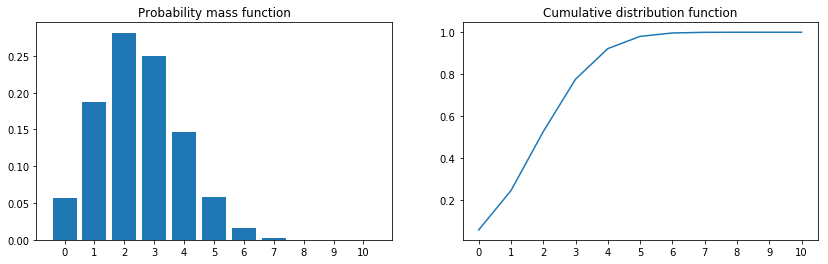

In [15]:
plot_probs_n(10)

### Null Hypothesis Testing framework

**1. State Null and alternative hypotheses** - Each hypothesis test includes two hypothesis about the population.  One is the null hypothesis, notated as Ho, which is a statement of a particular parameter value.  This hypothesis is assumed to be true until there is evidence to suggest otherwise.  The second hypothesis is called the alternative, notated as Ha.  The alternative hypothesis is a statement of a range of alternative values in which the parameter may fall.  One must also check that any assumptions (conditions) needed to run the test have been satisfied e.g. normality of data, independence, and number of success and failure outcomes.

**2. Set in advanced some level of significance, called alpha** -  This value is used as a probability cutoff for making decisions about the null hypothesis.  This alpha value represents the probability we are willing to place on our test for making an incorrect decision in regards to rejecting the null hypothesis.  The most common alpha value is 0.05  or 5%. Other popular choices are 0.01 (1%) and 0.10 (10%). This is the area under the curve (marked red). `If our test statistic comes in (red) tail part then we would Reject H0 else we will not Reject H0`. 
![AlphaRegion_RejectionRegion](img/alphaRegion_rejectionRegion_2.png "Rejection region")

**3. Find the CV ( Critical Value or P-Value )** - This is done by refering a ready table of CV like z-table or t-table. 

**4. Calculate a test statistic** - Calculate a test statistic.  The test statistic is calculated under the assumption the null hypothesis is true, and incorporates a measure of standard error and assumptions (conditions) related to the sampling distribution. 

**5. Make a test decision about the null hypothesis -**  In this step we decide to either reject the null hypothesis or decide to fail to reject the null hypothesis. `If our test statistic comes in (red) tail part then we would Reject H0 else we will not Reject H0`.  

**6. State an overall conclusion -** Once we have found the p-value or rejection region, and made a statistical decision about the null hypothesis (i.e. we will reject the null or fail to reject the null).  Following this decision, we want to summarize our results into an overall conclusion for our test.

<h2>Some Statistical test from <code>scipy.stats</code></h2>

* kurtosistest(a[, axis, nan_policy])	Tests whether a dataset has normal kurtosis
* normaltest(a[, axis, nan_policy])	Tests whether a sample differs from a normal distribution.
* skewtest(a[, axis, nan_policy])	Tests whether the skew is different from the normal distribution.
* pearsonr(x, y)	Calculates a Pearson correlation coefficient and the p-value for testing non-correlation.
* ttest_1samp(a, popmean[, axis, nan_policy])	Calculates the T-test for the mean of ONE group of scores.
* ttest_ind(a, b[, axis, equal_var, nan_policy])	Calculates the T-test for the means of two independent samples of scores.
* ttest_ind_from_stats(mean1, std1, nobs1, ...)	T-test for means of two independent samples from descriptive statistics.
* ttest_rel(a, b[, axis, nan_policy])	Calculates the T-test on TWO RELATED samples of scores, a and b.
* kstest(rvs, cdf[, args, N, alternative, mode])	Perform the Kolmogorov-Smirnov test for goodness of fit.
* chisquare(f_obs[, f_exp, ddof, axis])	Calculates a one-way chi square test.
* ansari(x, y)	Perform the Ansari-Bradley test for equal scale parameters
* bartlett(*args)	Perform Bartlett’s test for equal variances
* levene(*args, **kwds)	Perform Levene test for equal variances.
* shapiro(x[, a, reta])	Perform the Shapiro-Wilk test for normality.
* anderson(x[, dist])	Anderson-Darling test for data coming from a particular distribution
* anderson_ksamp(samples[, midrank])	The Anderson-Darling test for k-samples.

## Does alcohol consumption affect academic performance?

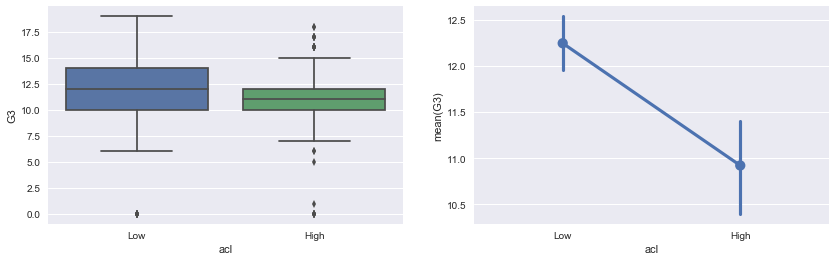

In [23]:
fig, axes = plt.subplots(1,2, figsize = (14,4))
sns.boxplot(x='acl', y='G3', data=student, ax=axes[0])
sns.pointplot(x='acl', y='G3', data=student, ax=axes[1]);

The visualizations sugest there is a difference between the means of the final grade of the two groups. Now we will perform a formal statistical test to confirm the hypothesis that students with High alcohol consumption level perform worse than the students with Low alcohol consumption level.

> **Null Hypothesis: for both groups (High and Low ACL) the population means of the final grade are equal.**

>  **Alternative Hypothesis: The population means of the final grades are different.**

A common test to apply in for these cases is the two-sample t-test, which is used to determine if two population means are equal. 

All statistical tests have assumptions that must be checked for their conclusions to be valid, for these test the assumptions are:

1. **Independent samples**: we will assume that the method for collecting the data assured that the answers given by the students are independent.
2. **Large enough sample size or observations come from a normally-distributed population**: this assumption is required if we are working with small samples (less than 30), since in the smaller group we have 166 observations we can say that we have a "large enough" sample.
3. **Variances are equal**

In addition this test have two versions: one assuming equal variances and the other assumming unequal variances.

According to the test we can not reject the Null hypothesis of equal variances, so we will assume that the two samples come from a population with the same population variances. Time to perform our t-test.

In [35]:
grades_low_acl = student['G3'][student['acl']=='Low']
grades_high_acl = student['G3'][student['acl']=='High']
stats.ttest_ind(grades_low_acl, grades_high_acl, equal_var=True)

# Here statistic = 4.621 means the test statistic 
# pvalue = 4.603e-06 means -> the two-tailed p-value.
# Imagine a bell curve with either of its 2-ends marked in RED at 4.603e-06 
# and our value of +4.621 would be out of the acceptance region, well in the RED Region. 

# Source : https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
# Note : We can use this test, if we observe two independent samples from 
# the same or different population, e.g. exam scores of boys and girls 
# or of two ethnic groups. 
# The test measures whether the average (expected) value differs 
# significantly across samples. If we observe a large p-value, 
# for example larger than 0.05 or 0.1, then we cannot reject the 
# null hypothesis of identical average scores. 
# If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, 
# then we reject the null hypothesis of equal averages.

# Hence (in this case) as 4.603__e-06 is <<< 0.05 hence REJECT the H0 

Ttest_indResult(statistic=4.621320706949354, pvalue=4.6036088303692694e-06)

Since we got such a low p-value we can reject the Null hypothesis of equal means for the two groups at a level of significance of 5% i.e we can reject the H0 with 95% confidence.

> **Conclusion: there is a statistical significant difference between the grades in the two analyzed groups, since the mean for the group with high alcohol consumption is less than the mean of the other group, the results suggest that alcohol consumption has a negative impact on students' academic performance.**

## Do male teenagers drink more than female teenagers?

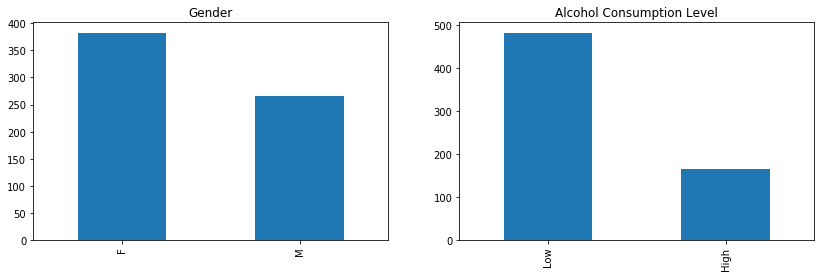

In [36]:
fig, axes = plt.subplots(1,2, figsize = (14,4))
student['gender'].value_counts().plot(kind='bar', ax=axes[0], title='Gender')
student['acl'].value_counts().plot(kind='bar', ax=axes[1], title='Alcohol Consumption Level');

In [37]:
gender_acl_table = pd.crosstab(student['acl'], student['gender'])
gender_acl_table

gender,F,M
acl,,
High,62,104
Low,321,162


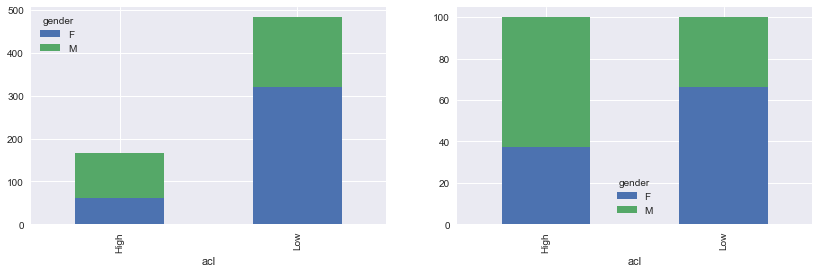

In [28]:
fig, axes = plt.subplots(1,2, figsize = (14,4))
gender_acl_table.plot(kind='bar', stacked=True, ax=axes[0]);
(100*(gender_acl_table.T/gender_acl_table.apply(sum, axis=1)).T).plot(kind='bar', stacked=True, ax=axes[1]);

**`Good Read :`**

https://oneau.wordpress.com/2011/02/28/simple-statistics-with-scipy/

https://scipy-lectures.org/packages/statistics/index.html#hypothesis-testing-comparing-two-groups

https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/


`Please Note` : Statistics is a very wide and mathematical topic and beyond the scope of this course. The objective of this NB is to get you introduced to SciPy stats sub-package.